# Исследование объявлений о продаже квартир Ленинградской области

Имеются данные сервиса Яндекс.Недвижимость за несколько лет. Цель работы определить рыночную стоимость объектов недвижимости.

### Первичный анализ данных и импорт библиотек

Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

Задаем параметр для преобразования чисел без "e"

In [2]:
pd.options.display.float_format = '{:.2f}'.format

Получение датафрейма

In [3]:
df = pd.read_csv('real_estate_data.csv', sep='\t')

Вывод первых 20 строчек датафрейма

In [4]:
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,...,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


Получение общей информации

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Выведем гистограммы, отражающие распределение каждого столбца

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

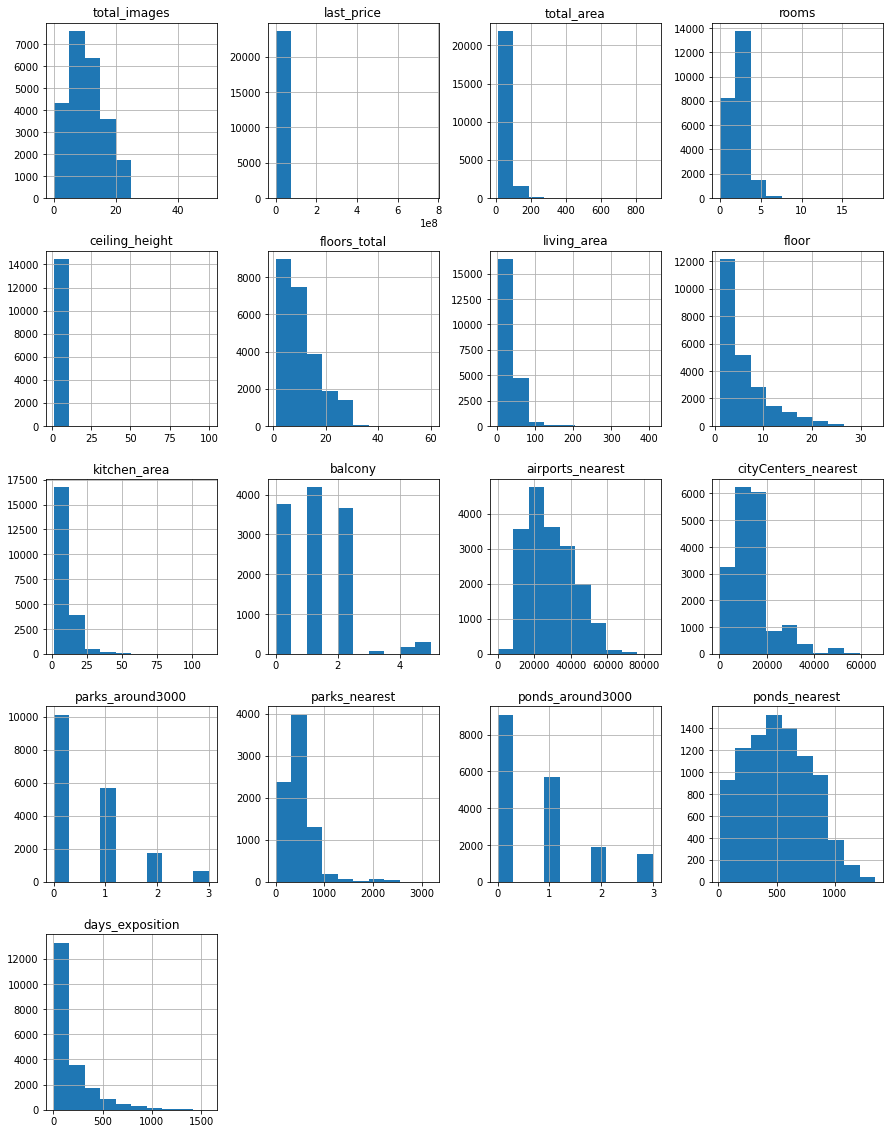

In [6]:
df.hist(figsize=(15, 20))

#### Выводы
В ходе первичного изучения данных было обнаружено, что в следующих столбцах присутствуют пропуски:
- 	***ceiling_height*** (высота потолков в метрах),
- 	***floors_total*** (всего этажей в доме),
- 	***living_area*** (жилая площадь в квадратных метрах),
- 	***is_apartment*** (апартаменты – булев тип),
- 	***kitchen_area*** (площадь кухни в квадратных метрах),
- 	***balcony*** (число балконов),
-   ***locality_name*** (название населенного пункта)
- 	***airports_nearest*** (расстояние до ближайшего аэропорта в метрах),
- 	***cityCenters_nearest*** (расстояние до центра города),
- 	***parks_around3000*** (число парков в радиусе 3 км),
- 	***parks_nearest*** (расстояние до ближайшего парка в метрах),
- 	***ponds_around3000*** (число водоёмов в радиусе 3 км),
- 	***ponds_nearest*** (расстояние до ближайшего водоёма в метрах),
- 	***days_exposition*** (сколько дней было размещено объявление (от публикации до снятия))

Помимо этого, было обнаружено, что к некоторым столбцам с данными относятся некорректные типы данных:
- Столбец ***last_price*** имеет тип данных *float*, но вероятнее всего запись в десятичном виде необязательна, поэтому можно было бы перевести столбец в тип данных *int*.
- Столбец ***first_day_exposition*** имеет тип данных *object*, но данные отражают определенную дату, соответственно должен быть тип данных *datetime* ( формат данных: %Y.%m.%dT%H:%M:%S) (может стоит попробовать перевести в дату без времени)
- Столбец ***floors_total*** имеет тип данных *float*, но его значения отражают целые значения, поэтому стоит перевести его в *int*
- Столбец ***is_apartment*** типа *object*, но по сути он должен быть *bool*
- Столбец ***balcony*** типа float, но должен быть типа int, так как значения столбцов отражают целые числа
- Столбцы ***airports_nearest***, ***cityCenters_nearest***, ***parks_around3000***, ***parks_nearest***, ***ponds_around3000***, ***ponds_nearest***, ***days_exposition*** стоит перевести из float в  int, так как  значения столбцов отражают целые числа

### Предобработка данных

Проведем замену пропущенных значений там, где возможно, заменим некорректные типы данных и проведем небольшую аналитику каждого столбца для выявления аномальных значений.

### Работа со столбцами и их предобработка

#### Столбец last_price

###### **Работа с пропусками**
Все отлично
###### **Работа с типом данных**
Все отлично
###### **Работа аномальными значениями**
Обнаружено минимальное значение, которое не может соответствовать стоимости квартиры – 12190. Возможно, имелось ввиду значение, умноженное на тысячу, то есть 12190000, что вполне может быть реальным, с учетом площади квартиры.

In [7]:
display(df['last_price'].describe())

count       23699.00
mean      6541548.77
std      10887013.27
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

Видно минимальное значение 12190. Выведем строку полностью для подробного рассмотрения

In [8]:
display(df[df['last_price'] == df['last_price'].min()]) # Вывод строчки с минимальной стоимостью жилья

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.00,109.00,2019-03-20T00:00:00,2,2.75,25.00,32.00,25,NaN,...,40.50,NaN,Санкт-Петербург,36421.00,9176.00,1.00,805.00,0.00,NaN,8.00


Умножим это число на 1000

In [9]:
df['last_price'] = df['last_price'].where(df['last_price'] != df['last_price'].min(), other= df['last_price'] * 1000)

#### Столбец first_day_exposition
###### **Работа с пропусками**
Все отлично
###### **Работа с типом данных**
Столбец *first_day_exposition* имеет тип данных *object*, но данные отражают определенную дату, соответственно должен быть тип данных *datetime* ( формат данных: %Y.%m.%dT%H:%M:%S)
###### **Работа аномальными значениями**
Аномальных значений нет

Заменяем тип данных на datetime

In [10]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

#### Столбец rooms

###### **Работа с пропусками**
Пропусков нет
###### **Работа с типом данных**
Целочисленный тип данных подходит под специфику значений
###### **Работа аномальными значениями**
Обнаружено 197 значений, где указано 0 комнат. Вероятнее всего, все эти значения относятся либо к студиям, либо к квартирам со свободной планировкой. По сути, в обоих случаях не может быть, чтобы не было ни одной комнаты, поэтому стоит перевести нули в единицы.

In [11]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Видно, что присутствуют 197 значений, где указано 0 комнат. Проверим, что ко всем нулям в столбце относятся значения true в столбцах studio и open_plan

In [12]:
df.query('rooms  == 0  & (studio == True | open_plan == True)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.00,27.00,2017-03-30,0,NaN,24.00,15.50,2,NaN,...,NaN,2.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.00
349,4,2320000.00,25.00,2017-09-27,0,NaN,14.00,17.00,1,NaN,...,NaN,0.00,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.00
440,8,2480000.00,27.11,2018-03-12,0,NaN,17.00,24.75,4,NaN,...,NaN,2.00,Санкт-Петербург,38171.00,15015.00,0.00,NaN,2.00,982.00,64.00
508,0,3375000.00,34.40,2017-03-28,0,NaN,26.00,24.30,19,NaN,...,NaN,1.00,посёлок Парголово,53115.00,19292.00,0.00,NaN,1.00,593.00,430.00
608,2,1850000.00,25.00,2019-02-20,0,NaN,10.00,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.00,26.00,2017-09-01,0,NaN,25.00,18.00,16,NaN,...,NaN,0.00,Санкт-Петербург,11405.00,13222.00,0.00,NaN,1.00,623.00,14.00
23442,0,2500000.00,27.70,2017-09-28,0,NaN,24.00,18.00,4,NaN,...,NaN,2.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.00
23554,15,3350000.00,26.00,2018-09-07,0,NaN,19.00,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.00,17092.00,0.00,NaN,2.00,112.00,31.00
23592,10,1450000.00,29.00,2017-11-11,0,NaN,9.00,18.00,8,NaN,...,NaN,2.00,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.00


Видно, что в срезе содержатся все 197 строки со значениями 0 в столбце rooms. Тем самым можно сделать вывод, что есть взаимосвязь между количеством комнат и типом квартиры (столбцы studio и open_plan). Оставим нули для того, чтобы различать студии от однокомнатных квартир

#### Столбец ceiling_height
###### **Работа с пропусками**
Этот столбец отражает высоту потолков в метрах. Поскольку процент пропусков составляет **38.8 %**, их заполнение обязательно. В данном случае незаполнение графы высоты потолков вероятнее всего ни от чего не зависело, поэтому пустые строки были заменены медианным значением всех имеющихся высот 2.65м (что равно стандартной высоте потолков в России)
###### **Работа с типом данных**
Тип float64 соответствует данным в столбце, изменений не требуется
###### **Работа аномальными значениями**
Были разделены значения, большие 10 метров на 10, так как могла произойти такая ситуация, что клиент не поставил разделительный символ при указании высоты своих потолков. Помимо этого, следует были удалены значения высот потолков менее 2.4‑м, так как это 2.4 м – минимально возможная высота потолков.

Заменим все пропуски медианным значением

In [13]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Рассмотрим столбец поподробнее, построив ящик с усами

<AxesSubplot:>

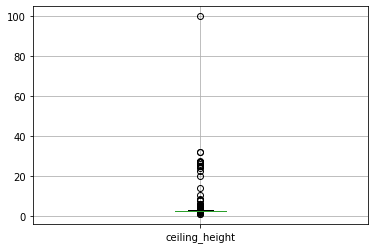

In [14]:
df.boxplot('ceiling_height')

Видно, что присутствует много значений больше 20 метров. Это может быть связано с пропуском разделительного знака, ведь это пользовательские данные, в которых могут присутствовать ошибки. С другой стороны, по строительным нормативам потолок не может быть ниже 2.4 метров. Поделим все значения, которые больше или равны 10 на 10 и удалим все значения, меньшие 2.4 м

In [15]:
df['ceiling_height'] = df['ceiling_height'].where((df["ceiling_height"]<=20) | df["ceiling_height"].isna() == True, other = df["ceiling_height"]/10)
df = df[df['ceiling_height'] >= 2.4]

#### Столбец floors_total
##### Работа с пропусками
С учетом того, что процент пропусков составляет менее одного процента (**0.36%**), заполнять пропуски необязательно, так как это сильно не повлияет на результаты. Незаполнение вероятнее всего ни от чего не зависело, клиент посчитал графу необязательной
##### Работа с типом данных
Данному столбцу не подходит тип данных *float*, его стоит перевести в *Int64*. Выбран именно этот тип данных в связи с тем, что в столбце есть пропуски, а классический int64 не позволит перевести тип данных из-за них.
##### Работа с аномальными значениями
Одна из моих гипотез заключается в том, что может быть такое, что указанный этаж будет выше, чем общее количество этажей в здании. Результатом проверки было получено, что аномальных значений в столбце нет.

Проверим данные на корректность: все этажи точно должны быть меньше или равны общему количеству этажей. Поэтому попробуем вывести датафрейм с условием, что общее количество этажей меньше указанного этажа

In [16]:
display(df[df['floors_total'] < df['floor']])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Видим, что этажи всегда меньше, чем общее количество

Переведем тип данных в Int64. Выбран именно этот тип данных в связи с тем, что в столбце есть пропуски, а классический int не позволяет перевести тип данных из-за них.

In [17]:
df['floors_total'] = df['floors_total'].astype('Int64')

#### Столбец living_area
##### Работа с пропусками
Процент пропусков в данном столбце составляет **8.03%**. В данном случае, предугадать площади квартир нельзя, так как все квартиры разные, с разной и в большинстве случаев уникальной планировкой. Поэтому заменять пустые значения медианным значением не совсем правильно, поэтому были оставлены пропуски. Вероятнее всего графа необязательна, поэтому человек не посчитал важным ее заполнение.
##### Работа с типом данных
Тип данных подходит к значениям столбца
##### Работа с аномальными значениями
Данные выглядят нормально, однако стоило бы проверить величины жилой площади, которые должны быть меньше, чем общая площадь квартиры. Обнаружено, что есть такие случаи, когда жилая площадь равна общей. Вероятнее всего, это связано с тем, что эти квартиры имеют "свободную планировку".

Проверим гипотезу о том, что общая квартира должна быть больше или равна жилой площади.

In [18]:
df[df['total_area'] <= df['living_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9861,10,2350000.00,25.00,2017-12-03,0,2.65,22,25.00,17,NaN,...,NaN,2.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,13.00
12691,1,3700000.00,24.20,2017-11-10,0,2.65,19,24.20,13,NaN,...,NaN,1.00,Санкт-Петербург,17837.00,16840.00,0.00,NaN,2.00,210.00,74.00


Видим, что вывелись строки, при которых значения total_area равны значениям living_area. Вероятнее всего это взаимосвязано с тем, что эти квартиры имеют свободную планировку.

#### Столбец is_apartment
##### Работа с пропусками
В этом столбце подавляющее большинство значений не заполнено (**88.29%**), для проведения аналитики по этому критерию надо заполнить пропуски. Вероятнее всего, люди, которые продают апартаменты, в чаще укажут, информацию об этом, так как на рынке недвижимости больше квартир, чем апартаментов. Поэтому будем считать, что не все люди видели смысл в заполнении графы *"апартаменты"* и заполним пропуски значениями **False**
##### Работа с типом данных
Стоит изменить тип данных object на bool
##### Работа с аномальными значениями
Аномальных значений нет

Заменим пропущенные значения через метод fillna() на False и переведем тип данных object на bool

In [19]:
df['is_apartment'] = df['is_apartment'].fillna(False).astype('bool')

#### Столбец kitchen_area
##### Работа с пропусками
В этом столбце ситуация такая же, что и со столбцом **living_area**. Оставлены пропуски.
##### Работа с типом данных
Тип данных подходит к значениям столбца.
##### Работа с аномальными значениями
Данные выглядят нормально, однако стоило бы проверить величины площади также, как и было в столбце living_area. Обнаружено, что есть такие случаи, когда жилая площадь равна общей. Вероятнее всего, это связано с тем, что эти квартиры имеют "свободную планировку".


In [20]:
df[df['total_area'] <= df['kitchen_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Видно, что аномально высоких значений нет

#### Столбец balcony
##### Работа с пропусками
Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0
##### Работа с типом данных
Тип данных стоит заменить на int, так как количество балконов – целое число
##### Работа с аномальными значениями
Аномальных значений нет

Заменим пропущенные значения через метод fillna() на 0

In [21]:
df['balcony'] = df['balcony'].fillna(0)

Переведем тип данных в int

In [22]:
df['balcony'] = df['balcony'].astype('int64')

#### Столбец locality_name
##### Работа с неявными дубликатами
Один из вариантов, который позволит разобраться с неявными дубликатами, это удаление приставки перед названием города или поселка.
##### Работа с пропусками
Так как в столбце процент пропусков составляет **0.21%**, можно за них не бороться, так как они сильно не повлияют на аналитику.
##### Работа с типом данных
Тип данных подходит под значения столбца.

Занесем все возможные названия и их составные в список trash, по которому будем итерироваться и заменять эти значения на ''

In [23]:
trash = ['городской поселок',
         'городской посёлок',
         'посёлок городского типа',
         'имени',
         'поселок городского типа',
         'посёлок',
         'поселок',
         'деревня',
         'коттеджный',
         'коттеджный',
         'посёлок при железнодорожной станции',
         'садоводческое некоммерческое товарищество',
         'садовое товарищество',
         'село',
         'поселок станции',
         'посёлок станции',
         'станции',
         'при железнодорожной',
         'город'
         ]
for i in trash:
    df['locality_name'] = df['locality_name'].str.replace(i+' ','')
print(df['locality_name'].unique())

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'Новая Ропша' 'Павловск' 'Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи' 'Аннино'
 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Красное Село' 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'Сланцы'
 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'Новый Свет' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры'
 'Рощино' 'Кириши' 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж'
 'Копорье' 'Молодёжное' 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно'
 'Стрельна' 'Бокситогорск' 'Александровская' 'Лопухинка' 'Пикалёво'
 'Терволово' 'Советский' 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо'
 'Вырица' 'Кипень' 'Келози' 'Вартемяги' 'Тельмана' '

Видим, что процедура исключения неявных дубликатов прошла успешно

#### Столбец airports_nearest
##### Работа с пропусками
Процент пропусков в столбце составляет *23.38%*. Вероятнее всего, пропущенные значения означают, что расстояние до ближайшего аэропорта более 85000м (примерно максимальное значение). Поскольку явных вариантов заполнения пропусков, который не повлиял на распределение нет, оставлено все как есть. Это будет индикатором, что квартира далеко от аэропорта.
##### Работа с типом данных
Тип данных подходит под специфику значений
##### Работа с аномальными значениями
Обнаружено минимальное значение, равное нулю, что не может быть правдой.

Рассмотрим подробнее значения столбца

In [24]:
df['airports_nearest'].describe()

count   18150.00
mean    28792.35
std     12631.86
min         0.00
25%     18582.00
50%     26726.00
75%     37273.00
max     84869.00
Name: airports_nearest, dtype: float64

Удалим строчку со значением 0 в столбце airports_nearest

In [25]:
df = df[df['airports_nearest'] != 0]

#### Столбец cityCenters_nearest

Название столбца переведен в "змеиный" вид.
##### Работа с пропусками
Процент пропусков в столбце составляет *23.29%*. Вероятнее всего, пропущенные значения означают, что расстояние до ближайшего центра города более 66000 (примерно максимальное значение). Поскольку явных вариантов заполнения пропусков, который не повлиял на распределение нет, оставлено все как есть. Это будет индикатором, что квартира далеко от центра города.
##### Работа с типом данных
Тип данных подходит под специфику значений
##### Работа с аномальными значениями
Аномальных значений не наблюдается

Приведем название столбца в порядок: переведем в "змеиный" вид.

In [26]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

##### Столбец parks_around3000
##### Работа с пропусками
Вероятнее всего, пропуски в данном столбце означают, что в диапазоне 3 км парков нет. Поэтому была проведена замена отсутствующих значений на 0.
##### Работа с типом данных
Была проведена замена типа данных в int
##### Работа с аномальными значениями
Аномальных значений не обнаружено

Заполним пустые значения нулями

In [27]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)

Переведем тип данных в int

In [28]:
df['parks_around3000'] = df['parks_around3000'].astype('int')

##### Столбец parks_nearest
##### Работа с пропусками
Процент пропусков в столбце составляет *65.91%*. Вероятнее всего, пропущенные значения означают, что расстояние до ближайшего парка больше какого-либо максимального значения. Заполнять пропуски средним значением нельзя, поэтому оставлено все как есть. Это будет индикатором, что квартира далеко от парка.
##### Работа с типом данных
Тип данных подходит под специфику значений
##### Работа с аномальными значениями
Аномальных значений не обнаружено

##### Столбец ponds_around3000
##### Работа с пропусками
Процент пропусков в столбце составляет *23.28%*. Вероятнее всего, пропущенные значения означают, что расстояние до ближайшего парка больше какого-либо максимального значения. Заполнять пропуски средним значением нельзя, поэтому оставим как есть. Это будет индикатором, что квартира далеко от парка.
##### Работа с типом данных
Тип данных подходит под специфику значений
##### Работа с аномальными значениями
Аномальных значений не обнаружено

Заполним пропущенные значения на 0

In [29]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

Заменим тип данных на int

In [30]:
df['ponds_around3000'] = df['ponds_around3000'].astype('int')

##### Столбец ponds_nearest
##### Работа с пропусками
Процент пропусков в столбце составляет *61.55%*. Вероятнее всего, пропущенные значения означают, что расстояние до ближайшего центра города более 66000 (примерно максимальное значение). Поскольку явных вариантов заполнения пропусков, который не повлиял на распределение нет, оставлено все как есть. Это будет индикатором, что квартира далеко от центра города.
##### Работа с типом данных
Тип данных подходит под специфику значений
##### Работа с аномальными данными
Аномальные данные отсутствуют

#### Столбец days_exposition
##### Работа с пропусками
Так как процент пропусков составляет 8.6 процентов, то пропущенными данными можно пренебречь
##### Работа с типом данных
Переедем тип данных из float в Int64
##### Работа с аномальными значениями
Аномальных значений не обнаружено

Переведем тип данных из float в Int64

In [31]:
df['days_exposition'] = df['days_exposition'].round(0).astype('Int64')

Проверим датафрейм еще раз

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23676 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23676 non-null  int64         
 1   last_price            23676 non-null  float64       
 2   total_area            23676 non-null  float64       
 3   first_day_exposition  23676 non-null  datetime64[ns]
 4   rooms                 23676 non-null  int64         
 5   ceiling_height        23676 non-null  float64       
 6   floors_total          23590 non-null  Int64         
 7   living_area           21776 non-null  float64       
 8   floor                 23676 non-null  int64         
 9   is_apartment          23676 non-null  bool          
 10  studio                23676 non-null  bool          
 11  open_plan             23676 non-null  bool          
 12  kitchen_area          21401 non-null  float64       
 13  balcony         

В заключение, проверим датафрейм на полные дубликаты:

In [33]:
df.duplicated().sum()

0

Видно, что полные дубликаты отсутствуют.

#### Выводы
Была проведена предобработка данных. Были обработаны пропуски и заполнены, где это возможно. Помимо этого, были заменены типы данных на корректные и проведена небольшая аналитика, которая понадобится для определения аномальных значений.

### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метра


Добавим новый столбец, отражающий цену квадратного метра каждой квартиры. Поделим столбец 'last_price' на 'total_area'

In [34]:
df['sq_meter'] = df['last_price'] / df['total_area']

#### День недели, месяц и год публикации объявления

Добавим день недели, месяц и год публикации объявления в датафрейм:

In [35]:
df['weekday_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year

#### Этаж квартиры

Типы этажей квартиры должны соответствовать следующим категориям: (значения — «первый», «последний», «другой»);

In [36]:
df['floor_category'] = df['floor']
df['floor_category'] = df['floor_category'].where(df['floor_category'] != df['floors_total'], 'последний')
df['floor_category'] = df['floor_category'].where(df['floor_category'] != 1,'первый')
df['floor_category'] = df['floor_category'].where(df['floor_category'].str.isdigit() == False, other='другой')

Проверим 10 случайных значений в столбцах

In [37]:
df[['floor', 'floors_total', 'floor_category']].sample(10)

,floor,floors_total,floor_category
18930,7,18,другой
10574,4,5,другой
23146,5,9,другой
17427,3,12,другой
17807,1,10,первый
6084,4,5,другой
21705,16,16,последний
5627,8,24,другой
12091,1,5,первый
12929,6,20,другой


### Расстояние до центра города в километрах

Создадим новый столбец, значения которого отражают значения столбца 'city_centers_nearest', поделенные на 1000 (переводим метры в километры)

In [38]:
df['city_centers_nearest_kilometers'] = (df['city_centers_nearest'] / 1000).round().astype('Int64')

Посмотрим итоговый результат добавления столбцов

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23676 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   total_images                     23676 non-null  int64         
 1   last_price                       23676 non-null  float64       
 2   total_area                       23676 non-null  float64       
 3   first_day_exposition             23676 non-null  datetime64[ns]
 4   rooms                            23676 non-null  int64         
 5   ceiling_height                   23676 non-null  float64       
 6   floors_total                     23590 non-null  Int64         
 7   living_area                      21776 non-null  float64       
 8   floor                            23676 non-null  int64         
 9   is_apartment                     23676 non-null  bool          
 10  studio                           23676 non-null  bool     

#### Выводы
Были добавлены новые столбцы, которые понадобятся в будущем для исследовательского анализа данных.

### Проведите исследовательский анализ данных

### Изучение параметров квартир

#### Общая площадь

Изучим информацию о столбце

In [40]:
df['total_area'].describe()

count   23676.00
mean       60.36
std        35.67
min        12.00
25%        40.00
50%        52.00
75%        70.00
max       900.00
Name: total_area, dtype: float64

Видим, что присутствуют аномально высокие значения (900 кв. метров). Медианное и среднее значения составляют 52 и 60.36 соответственно. Учтем это в построении гистограммы

<AxesSubplot:title={'center':'Общая площадь'}, xlabel='Площадь, кв.м.', ylabel='Частота'>

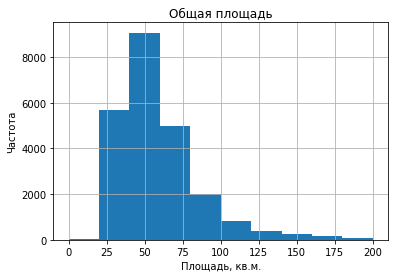

In [41]:
plt.title('Общая площадь')
plt.xlabel('Площадь, кв.м.')
plt.ylabel('Частота')
df['total_area'].hist(range=(0,200), bins=10)

Видим один пик, распределение с отрывом слева.

#### Жилая площадь

Изучим общую информацию о столбце

In [42]:
df['living_area'].describe()

count   21776.00
mean       34.46
std        22.04
min         2.00
25%        18.60
50%        30.00
75%        42.30
max       409.70
Name: living_area, dtype: float64

Видны аномально высокие и аномально низкие значения, среднее значение приближенно к медианному значению. Построим гистограмму, которая отразит основную часть данных.

<AxesSubplot:title={'center':'Жилая площадь'}, xlabel='Площадь, кв.м.', ylabel='Частота'>

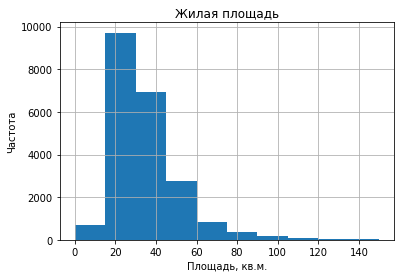

In [43]:
plt.title('Жилая площадь')
plt.xlabel('Площадь, кв.м.')
plt.ylabel('Частота')
df['living_area'].hist(range=(0,150), bins=10)

Действительно, среднее, равное 30, является максимальным значением относительно y. А медиана, расположена немного справа.

#### Площадь кухни

Изучим общую информацию о столбце

In [44]:
df['kitchen_area'].describe()

count   21401.00
mean       10.57
std         5.91
min         1.30
25%         7.00
50%         9.10
75%        12.00
max       112.00
Name: kitchen_area, dtype: float64

Среднее отличается от медианы, аномальных значений в столбце нет. Построим гистограмму по имеющимся данным.

<AxesSubplot:title={'center':'Кухонная площадь'}, xlabel='Площадь, кв.м.', ylabel='Частота'>

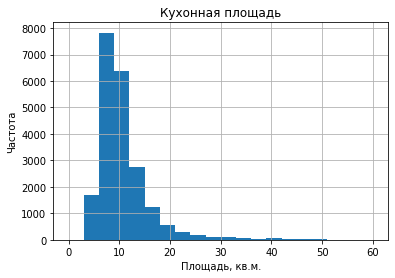

In [45]:
plt.title('Кухонная площадь')
plt.xlabel('Площадь, кв.м.')
plt.ylabel('Частота')
df['kitchen_area'].hist(range=(0,60), bins=20)

Видим, что максимальную частоту отражает медианное значение, нежели среднее.

#### Цена объекта

Получим общую информацию о столбце

In [46]:
df['last_price'].describe()

count       23676.00
mean      6545156.41
std      10891561.79
min        430000.00
25%       3420000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

Медианное значение отличается от среднего: они равны 4.65 миллионов и 6.5 миллионов соответственно. Есть "выбросы" в виде максимального значения(цена квартиры 763 млн рублей). Построим гистограмму.

<AxesSubplot:title={'center':'Стоимость'}, xlabel='Цена, десятки млн. руб.', ylabel='Частота'>

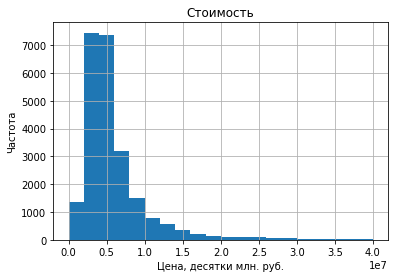

In [47]:
plt.title('Стоимость')
plt.xlabel('Цена, десятки млн. руб.')
plt.ylabel('Частота')
df['last_price'].hist(range=(0,40000000), bins=20)

Видно, что медианное и среднее значения соответствуют пикам на графике.

#### Количество комнат

Получим общую информацию о столбце

In [48]:
df['rooms'].describe()

count   23676.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

Медианное и среднее примерно равны. Имеются "выбросы" максимальных значений в виде квартир с 19 комнатами. Учтем все это при построении гистограммы.

<AxesSubplot:title={'center':'Количество комнат'}, xlabel='Количество комнат, шт.', ylabel='Частота'>

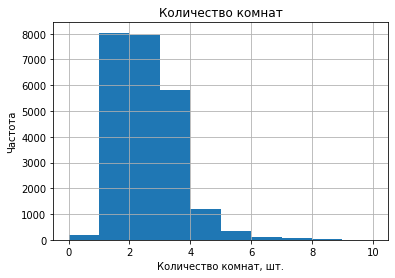

In [49]:
plt.title('Количество комнат')
plt.xlabel('Количество комнат, шт.')
plt.ylabel('Частота')
df['rooms'].hist(range=(0,10), bins=10)

Данные графика соответствуют информации выше.

#### Высота потолков

In [50]:
print(df['ceiling_height'].describe())

count   23676.00
mean        2.70
std         0.28
min         2.40
25%         2.60
50%         2.65
75%         2.70
max        20.00
Name: ceiling_height, dtype: float64


Все аномальные значения были отработаны, медиана очень похожа на среднее. Построим гистограмму

<AxesSubplot:title={'center':'Высота потолков'}, xlabel='Высота, м.', ylabel='Частота'>

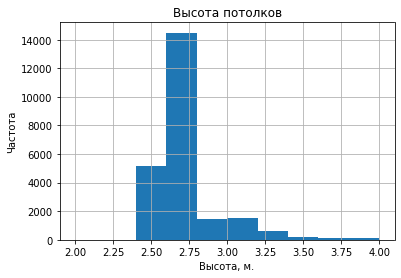

In [51]:
plt.title('Высота потолков')
plt.xlabel('Высота, м.')
plt.ylabel('Частота')
df['ceiling_height'].hist(range=(2,4), bins=10)

Видно, что среднее и медиана соответствуют пику на графике

#### Этаж квартиры

Рассмотрим значения столбца подробнее

In [52]:
print(df['floor'].describe())

count   23676.00
mean        5.89
std         4.89
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        33.00
Name: floor, dtype: float64


Видно, что среднее немного отличается от медианного: значения составляют 5.89 и 4 соответственно. Имеются "выбросы" в виде максимальных значений равные 33. Учтем это в построении гистограммы.

<AxesSubplot:title={'center':'Этаж'}, xlabel='Номер этажа', ylabel='Частота'>

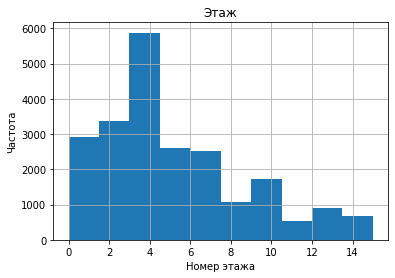

In [53]:
plt.title('Этаж')
plt.xlabel('Номер этажа')
plt.ylabel('Частота')
df["floor"].hist(range=(0,15), bins=10)

Видим, что значения медианы соответствуют пику на гистограмме.

#### Тип этажа квартиры («первый», «последний», «другой»)

Рассмотрим значения столбца подробнее

In [54]:
df['floor_category'].describe()

count      23676
unique         3
top       другой
freq       17349
Name: floor_category, dtype: object

Значения столбца категориальные (три уникальных значения), посчитаем в процентах, сколько какая категория составляет в данных

In [55]:
print('Процентная доля первых этажей',((df[df["floor_category"] == 'первый']["floor_category"].count() / (df["floor_category"].count())) * 100).round(1))
print('Процентная доля последних этажей', ((df[df["floor_category"] == 'последний']["floor_category"].count() / (df["floor_category"].count())) * 100).round(1))
print('Процентная доля других этажей',((df[df["floor_category"] == 'другой']["floor_category"].count() / (df["floor_category"].count())) * 100).round(1))

Процентная доля первых этажей 12.2
Процентная доля последних этажей 14.5
Процентная доля других этажей 73.3


Построим гистограмму

<AxesSubplot:title={'center':'Категория этажа'}, xlabel='Тип этажа', ylabel='Частота'>

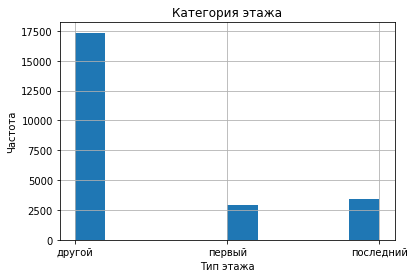

In [56]:
plt.title('Категория этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Частота')
df["floor_category"].hist()

Видно, что действительно, большая часть значений относятся к значению "другой", первых этажей меньше всего, и немного больше последних этажей.

#### Общее количество этажей в доме

Рассмотрим значения столбца подробнее

In [57]:
df["floors_total"].describe()

count   23590.00
mean       10.68
std         6.60
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

Среднее и медианное немного отличаются: они равны 10.67 и 9 соответственно.

<AxesSubplot:title={'center':'Общее количество этажей в доме'}, xlabel='Номер этажа', ylabel='Частота'>

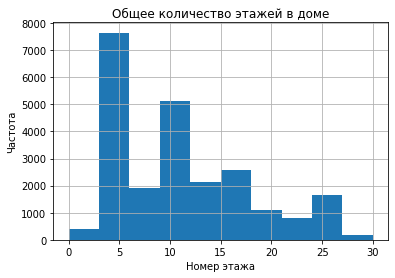

In [58]:
plt.title('Общее количество этажей в доме')
plt.xlabel('Номер этажа')
plt.ylabel('Частота')
df["floors_total"].hist(range=(0,30))

По полученному графику видно, что много квартир находятся в пятиэтажках, что соответствует выраженному пику.

#### Расстояние до центра города в метрах

Рассмотрим столбец подробнее

In [59]:
df["city_centers_nearest"].describe()

count   18172.00
mean    14190.29
std      8609.23
min       181.00
25%      9237.00
50%     13096.50
75%     16293.00
max     65968.00
Name: city_centers_nearest, dtype: float64

Видим, что медиана немного отклоняется от среднего. Имеются большие выбросы в максимальных значениях столбца

<AxesSubplot:title={'center':'Расстояние до центра города'}, xlabel='Расстояние, м.', ylabel='Частота'>

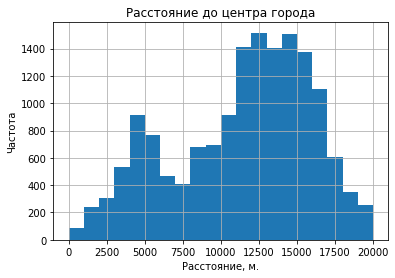

In [60]:
plt.title('Расстояние до центра города')
plt.xlabel('Расстояние, м.')
plt.ylabel('Частота')
df["city_centers_nearest"].hist(range=(0,20000), bins=20)

Видим, что пики ориентировочно подтверждают данные выше

#### Расстояние до ближайшего аэропорта;

Рассмотрим значения подробнее

In [61]:
df['airports_nearest'].describe()

count   18149.00
mean    28793.93
std     12630.40
min      6450.00
25%     18582.00
50%     26726.00
75%     37273.00
max     84869.00
Name: airports_nearest, dtype: float64

Видим схожесть среднего и медианы, аномальных значения не обнаруживается. Построим гистограмму

<AxesSubplot:title={'center':'Расстояние до аеропорта'}, xlabel='Расстояние, м.', ylabel='Частота'>

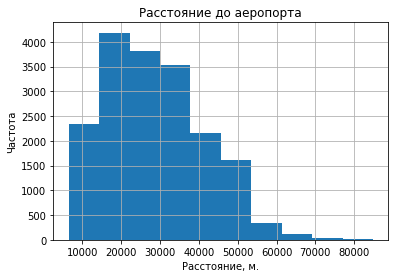

In [62]:
plt.title('Расстояние до аеропорта')
plt.xlabel('Расстояние, м.')
plt.ylabel('Частота')
df['airports_nearest'].hist()

Гистограмма подтверждает значения выше

#### Расстояние до ближайшего парка;

Рассмотрим значения столбца:

In [63]:
df['parks_nearest'].describe()

count   8075.00
mean     490.82
std      342.39
min        1.00
25%      288.00
50%      455.00
75%      612.00
max     3190.00
Name: parks_nearest, dtype: float64

Видим аномальное значение в минимуме, медианное значение похоже на среднее. Учтем все это и построим график

<AxesSubplot:title={'center':'Расстояние до ближайшего парка'}, xlabel='Расстояние, м.', ylabel='Частота'>

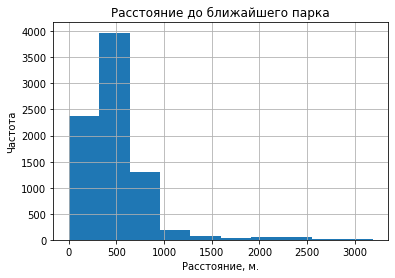

In [64]:
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние, м.')
plt.ylabel('Частота')
df['parks_nearest'].hist()

Гистограмма подтверждает значения выше

#### День и месяц публикации объявления

Рассмотрим столбцы подробнее

In [65]:
display(df['weekday_exposition'].describe())
display(df['month_exposition'].describe())

count   23676.00
mean        2.57
std         1.79
min         0.00
25%         1.00
50%         3.00
75%         4.00
max         6.00
Name: weekday_exposition, dtype: float64

count   23676.00
mean        6.40
std         3.49
min         1.00
25%         3.00
50%         6.00
75%        10.00
max        12.00
Name: month_exposition, dtype: float64

1. В столбце weekday_exposition, отражающем день публикации объявления, среднее значение и медианное составляют 2.57 и 3 соответственно. Это говорит о том, что чаще всего люди публикуют свои объявления примерно в среду - четверг. Аномальных значений нет, построим гистограмму
2. В столбце month_exposition, отражающем месяц публикации объявления, среднее значение и медианное составляют 6.40 и 6 соответственно. Видно, что значения очень близки друг к другу. Можно сделать вывод, что 6 месяц популярен в плане публикаций объявлений. Аномальных значений нет, построим гистограмму

<AxesSubplot:title={'center':'День публикации объявления'}, xlabel='День недели (0 - понедельник, 6 - воскресенье)', ylabel='Частота'>

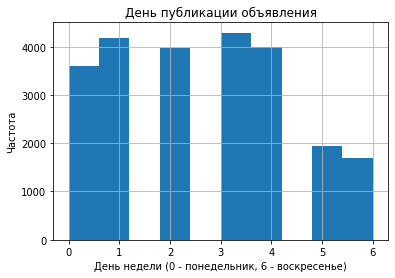

In [66]:
plt.title('День публикации объявления')
plt.xlabel('День недели (0 - понедельник, 6 - воскресенье)')
plt.ylabel('Частота')
df['weekday_exposition'].hist()

1. График подтверждает выводы, сделанные выше.

<AxesSubplot:title={'center':'Месяц публикации объявления'}, xlabel='Число месяца (1 - январь, 12 - декабрь)', ylabel='Частота'>

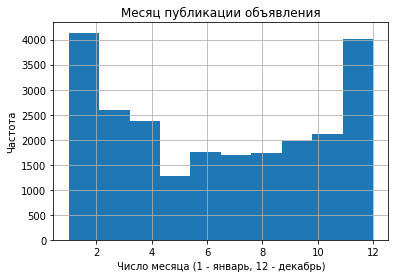

In [67]:
plt.title('Месяц публикации объявления')
plt.xlabel('Число месяца (1 - январь, 12 - декабрь)')
plt.ylabel('Частота')
df['month_exposition'].hist()

4. По графику видно, что пиковые значения не относятся к медиане или среднему. Самые частые публикации приходятся на конец или начало года (декабрь/январь)

#### Изучение скорости продажи квартиры (days_exposition)
- Постройте гистограмму.
- Посчитайте среднее и медиану.
- В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"

Рассмотрим столбец подробнее

In [68]:
df['days_exposition'].describe()

count   20498.00
mean      180.95
std       219.80
min         1.00
25%        45.00
50%        95.00
75%       232.00
max      1580.00
Name: days_exposition, dtype: float64

Медианное значение равно 95, а среднее равно 180.95. Есть выбросы в максимальных значениях (1580). Построим гистограмму

<AxesSubplot:>

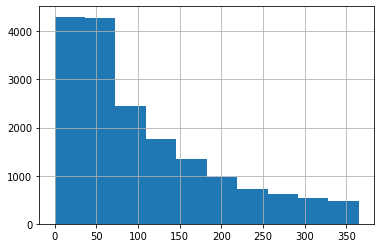

In [69]:
df['days_exposition'].hist(range=(0,365),bins=10)

По графику можно сказать, что в среднем квартиры продавались в течение полугода, а большая часть в течение первых трех месяцев. Рассмотрим аномально быстрые и аномально долгие продажи

Построим гистограмму, отражающую значения от 1 до первого квартиля (25%)

<AxesSubplot:>

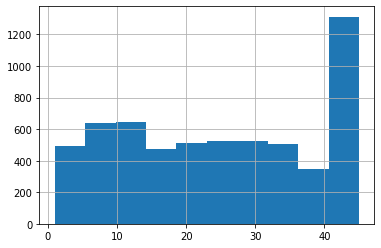

In [70]:
df['days_exposition'].hist(range=(1,45), bins=10)

В данном случае тяжело выделить какие-либо аномальные значения, Построим гистограмму, отражающую значения от третьего квартиля (75%) до конца

<AxesSubplot:>

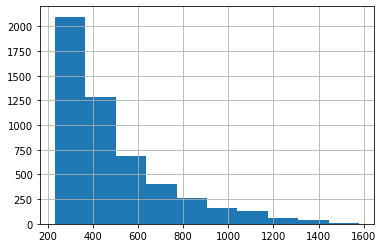

In [71]:
df['days_exposition'].hist(range=(232,1580), bins=10)

В данном случае тяжело выделить какие-либо аномальные значения, наблюдается нормальное распределение с усечением слева.

#### Вывод:
Во время проведения работы над столбцом, отражающим количество дней до продажи квартиры было установлено, что в среднем квартиры продаются за полгода, большая часть из них в течение 90 дней. Быстрыми можно считать продажи, которые были произведены менее, чем за 45 дней (первый квартиль распределения). Долгими можно считать продажи, которые были произведены более, чем за 232 дня (третий квартиль распределения)

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);

Разделим данное задание на две части: Сначала рассмотрим количественные данные, потом категориальные.

Перед этим сформируем срез данных, который отбросит все аномальные значения в рассматриваемых столбцах.
В ходе работы было получено:
Можно было бы рассмотреть стоимости квартир от 1 млн рублей до 200 млн рублей, так как сверху и снизу имеются выбросы
Можно было бы рассмотреть квартиры с общей площадью не более 300 кв.м.
Можно было бы рассмотреть квартиры с жилой площадью не более 200 кв.м.
Можно было бы рассмотреть квартиры с кухонной площадью не более 60 кв.м.
Можно было бы рассмотреть квартиры с количеством комнат не более 10.

In [72]:
clear_data = df.query('(1000000 <= last_price <= 200000000) and (total_area <= 300) and (living_area <= 200) and (kitchen_area <= 60) and (rooms <= 10)')
display(clear_data.shape[0] / df.shape[0])


0.8749788815678324

Видно, что было удалено менее 10 процентов данных, можно работать с нашим срезом

Рассмотрим столбец total_area

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

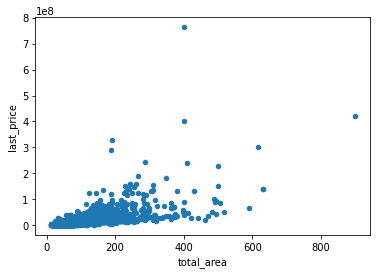

In [73]:
df.plot(x='total_area', y='last_price', kind='scatter')

По графику видно, что значения выше 300 кв.м можно считать выбросами. Построим новый график по новому срезу

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

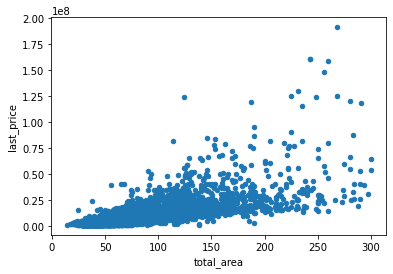

In [74]:
clear_data.plot(x='total_area', y='last_price', kind='scatter')

Вычислим коэффициент полученной корреляции

In [75]:
clear_data['last_price'].corr(clear_data['total_area'])

0.7215114543828527

Коэффициент между total_area и last_price говорит о положительной и средней силе связи (корреляции). Следовательно, при увеличении общей площади увеличивается цена.
По графику видно, что подавляющее большинство объявлений приходятся на квартиры примерно менее 300 кв.м.

#### Рассмотрим столбец living_area

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

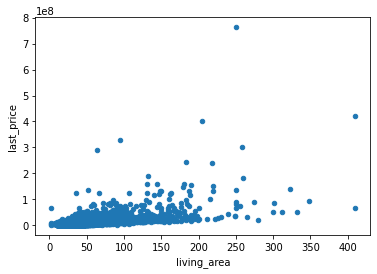

In [76]:
df.plot(x='living_area', y='last_price', kind='scatter')

Имеются аномальные значения, отбросим их и построим новый график

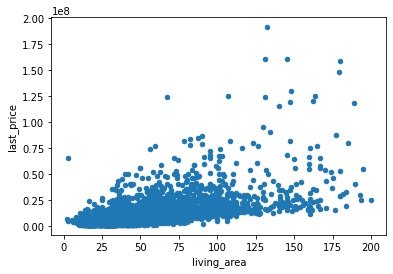

In [77]:
clear_data.plot(x='living_area', y='last_price', kind='scatter')
living_area_deleted = df['living_area'].count() - df.query('living_area <= 300')['living_area'].count() # Ведем подсчет удаленных строк

Вычислим коэффициент полученной корреляции

In [78]:
clear_data['last_price'].corr(clear_data['living_area'])

0.6352603915299003

Коэффициент между living_area и last_price говорит о положительной и слабой силе связи (корреляции). Это значит, что если и поднимается цена при увеличении жилой площади, то и совсем немного.
По графику видно, что подавляющее большинство объявлений приходятся на квартиры с жилой площадью примерно менее 200 кв.м.


#### Рассмотрим столбец kitchen_area

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

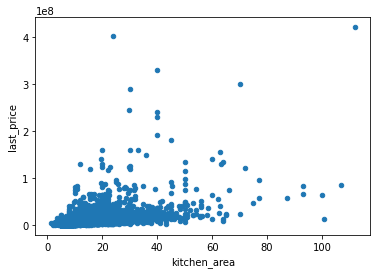

In [79]:
df.plot(x='kitchen_area', y='last_price', kind='scatter')

По графику видно, что значения выше 70 кв.м можно считать выбросами. Построим новый график по новому срезу


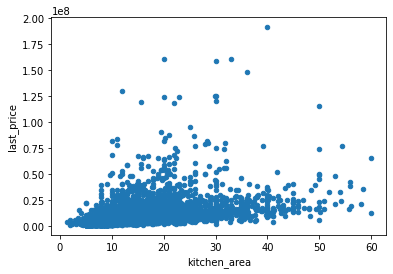

In [80]:
clear_data.plot(x='kitchen_area', y='last_price', kind='scatter')
kitchen_area_deleted = df['kitchen_area'].count() - df.query('kitchen_area <= 70')['kitchen_area'].count() # Ведем подсчет удаленных строк

Вычислим коэффициент полученной корреляции


In [81]:
clear_data['last_price'].corr(clear_data['kitchen_area'])

0.5229673497283203

Коэффициент между kitchen_area и last_price говорит о положительной и слабой силе связи (корреляции). Это значит, что если и поднимается цена при увеличении кухонной площади, то и совсем немного.
По графику видно, что подавляющее большинство объявлений приходятся на квартиры с кухонной площадью примерно менее или равной 50 кв.м.

#### Рассмотрим столбец rooms

<AxesSubplot:xlabel='rooms'>

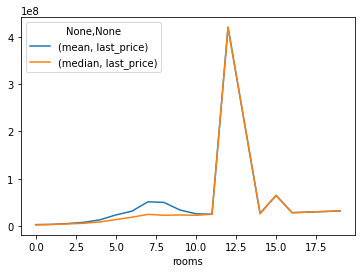

In [82]:
pd.pivot_table(df, index='rooms', values='last_price', aggfunc=['mean','median']).plot(kind='line')

По графику видно, что имеются выбросы на значении 12.5. Сформируем срез и построим новый график по данным

<AxesSubplot:xlabel='rooms'>

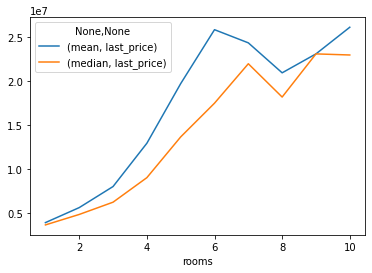

In [83]:
pd.pivot_table(clear_data, index='rooms', values='last_price', aggfunc=['mean','median']).plot(kind='line')


Несмотря на то, что на графике видны пики, отбрасывание квартир с аномально высокой стоимостью пошло на пользу: Теперь видно, что по мере увеличения количества квартир, увеличивается стоимость квартиры.

Рассмотрим качественные данные. Учитываем выбросы в стоимостях квартир

##### Столбец floor_category

Сформируем сводную таблицу со средними и медианными значениями стоимостей квартир

In [85]:
pd.pivot_table(clear_data, index='floor_category', values='last_price', aggfunc=['mean','median'])

,mean,median
,last_price,last_price
floor_category,,
другой,6511614.75,4900000.00
первый,4816028.94,4000000.00
последний,6415706.31,4400000.00


Построим столбчатую диаграмму по этим данным

<AxesSubplot:xlabel='floor_category'>

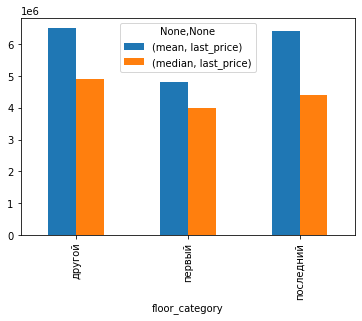

In [86]:
pd.pivot_table(clear_data, index='floor_category', values='last_price', aggfunc=['mean','median']).plot(kind='bar')

На графике видно, что средние и медианные в каждом случае различаются. Самая низкая средняя стоимость у квартир на первых этажах. Средние цены у других квартир ('последний' и 'другой' этажи) на разном уровне: у 'других' квартир значения выше.
Можно сделать вывод, что самые ценные квартиры это квартиры, которые находятся не на первом и последнем этажах.

##### Столбец year_exposition

Сформируем сводную таблицу со средними и медианными значениями стоимостей квартир

In [87]:
pd.pivot_table(clear_data, index='year_exposition', values='last_price', aggfunc=['mean','median'])

,mean,median
,last_price,last_price
year_exposition,,
2014,12031395.47,7640000.00
2015,7960708.83,5257500.00
2016,6540808.08,4600000.00
2017,6142746.64,4550000.00
2018,5942759.96,4650000.00
2019,6503627.11,5100000.00


Построим столбчатую диаграмму по этим данным

<AxesSubplot:xlabel='year_exposition'>

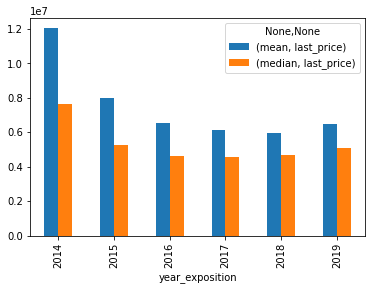

In [88]:
pd.pivot_table(clear_data, index='year_exposition', values='last_price', aggfunc=['mean','median']).plot(kind='bar')

По графику видно, что с 2014 до 2018 было падение цен, а с 2018 по 2019 начался небольшой рост

##### Столбец month_exposition

Сформируем сводную таблицу со средними и медианными значениями стоимостей квартир

In [89]:
pd.pivot_table(clear_data, index='month_exposition', values='last_price', aggfunc=['mean','median'])

,mean,median
,last_price,last_price
month_exposition,,
1,6389182.62,4699500.00
2,6267943.48,4750000.00
3,6247360.32,4700000.00
4,6222244.71,4850000.00
5,6253943.39,4600000.00
6,6299278.17,4500000.00
7,6321684.60,4680000.00
8,6390611.51,4643000.00


Построим столбчатую диаграмму по этим данным

<AxesSubplot:xlabel='month_exposition'>

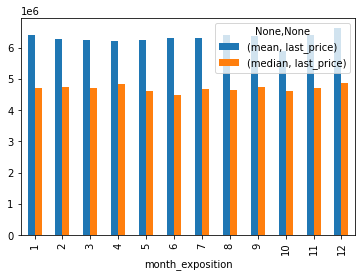

In [90]:
pd.pivot_table(clear_data, index='month_exposition', values='last_price', aggfunc=['mean','median']).plot(kind='bar')

По графику видно, что выраженных изменений в течение года не происходит, каждый месяц значения колеблются в небольшом диапазоне. Зависимости не наблюдается

##### Столбец weekday_exposition

Сформируем сводную таблицу со средними и медианными значениями стоимостей квартир

In [91]:
pd.pivot_table(clear_data, index='weekday_exposition', values='last_price', aggfunc=['mean','median'])

,mean,median
,last_price,last_price
weekday_exposition,,
0,6381111.05,4700000.00
1,6204739.88,4790000.00
2,6183340.77,4785000.00
3,6652179.18,4725000.00
4,6195517.93,4618270.00
5,6052970.43,4600000.00
6,6183492.57,4600000.00


Построим столбчатую диаграмму по этим данным

<AxesSubplot:xlabel='weekday_exposition'>

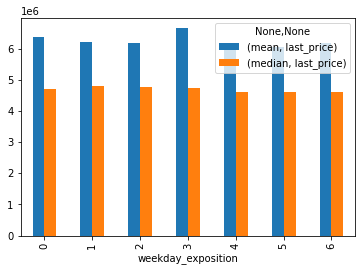

In [92]:
pd.pivot_table(clear_data, index='weekday_exposition', values='last_price', aggfunc=['mean','median']).plot(kind='bar')

По средним значениям виден небольшой пик в четверг (3), Цены на квартиры немного колеблются в течение недели

### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Для начала получим отсортированные по убыванию первые 10 самых больших по количеству объявлений населенных пунктов

In [93]:
top10 = df['locality_name'].value_counts().head(10)
top10

Санкт-Петербург    15714
Мурино               590
Кудрово              471
Шушары               440
Всеволожск           397
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               235
Name: locality_name, dtype: int64

Сначала получим срез со строчками, в которых города соответствуют населенным пунктам выше

In [94]:
df.query('locality_name in @top10.index')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_kilometers
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.00,2,755.00,<NA>,120370.37,3,3,2019,другой,16
1,7,3350000.00,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,NaN,0,NaN,81,82920.79,1,12,2018,первый,19
2,10,5196000.00,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,90.00,2,574.00,558,92785.71,3,8,2015,другой,14
3,0,64900000.00,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,84.00,3,234.00,424,408176.10,4,7,2015,другой,7
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.00,1,48.00,121,100000.00,1,6,2018,другой,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.00,35.30,2018-02-28,1,2.86,15,16.30,4,False,...,353.00,2,652.00,29,100566.57,2,2,2018,другой,16
23690,3,5500000.00,52.00,2018-07-19,2,2.65,5,31.00,2,False,...,300.00,0,NaN,15,105769.23,3,7,2018,другой,6
23691,11,9470000.00,72.90,2016-10-13,2,2.75,25,40.30,7,False,...,NaN,1,806.00,519,129903.98,3,10,2016,другой,4
23694,9,9700000.00,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,796.00,3,381.00,<NA>,72490.85,1,3,2017,другой,4


По этому срезу построим сводную таблицу, которая будет отражает средние стоимости квадратного метра в каждом городе. Отсортируем ее по убыванию.

In [95]:
df.query('locality_name in @top10.index').pivot_table(index='locality_name', values='sq_meter', aggfunc='mean'). sort_values(by='sq_meter',ascending=False)

,sq_meter
locality_name,
Санкт-Петербург,114854.38
Пушкин,103125.82
Кудрово,95326.18
Парголово,90175.91
Мурино,86087.51
Шушары,78677.36
Колпино,75424.58
Гатчина,68746.15
Всеволожск,68719.32


По полученным данным можно сделать вывод, что самая большая стоимость квадратного метра относится к Санкт-Петербургу. А самая низкая стоимость относится к Выборгу.

### Средняя цена каждого километра в Санкт-Петерурге

Для начала получим срез данных, относящихся только к Петербургу

In [96]:
df.query('locality_name == "Санкт-Петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_kilometers
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.00,2,755.00,<NA>,120370.37,3,3,2019,другой,16
2,10,5196000.00,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,90.00,2,574.00,558,92785.71,3,8,2015,другой,14
3,0,64900000.00,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,84.00,3,234.00,424,408176.10,4,7,2015,другой,7
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.00,1,48.00,121,100000.00,1,6,2018,другой,8
7,5,7915000.00,71.60,2019-04-18,2,2.65,24,NaN,22,False,...,NaN,0,NaN,<NA>,110544.69,3,4,2019,другой,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.00,35.30,2018-02-28,1,2.86,15,16.30,4,False,...,353.00,2,652.00,29,100566.57,2,2,2018,другой,16
23690,3,5500000.00,52.00,2018-07-19,2,2.65,5,31.00,2,False,...,300.00,0,NaN,15,105769.23,3,7,2018,другой,6
23691,11,9470000.00,72.90,2016-10-13,2,2.75,25,40.30,7,False,...,NaN,1,806.00,519,129903.98,3,10,2016,другой,4
23694,9,9700000.00,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,796.00,3,381.00,<NA>,72490.85,1,3,2017,другой,4


По полученным данным построим сводную таблицу, отражающую среднюю стоимость квартиры на каждый километр

In [97]:
df.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_nearest_kilometers',values='last_price',aggfunc='mean')

,last_price
city_centers_nearest_kilometers,
0,31449115.85
1,21206720.83
2,17788319.61
3,11126581.00
4,13304279.53
5,14499121.06
6,15338418.39
7,14775152.59
8,9953786.82


По полученным данным построим график

<AxesSubplot:xlabel='city_centers_nearest_kilometers'>

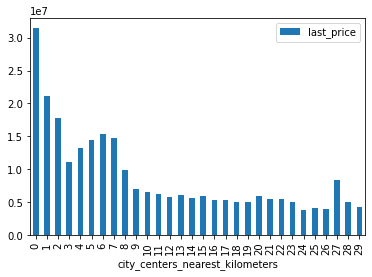

In [98]:
df.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_nearest_kilometers', values='last_price', aggfunc='mean').plot(kind='bar')

По графику видно: чем дальше от центра квартира, тем она дешевле. Однако есть небольшой скачок при 27 километрах.

### Общий вывод

**В данной работе были проанализированы данные об объявлениях о продаже квартир в Ленинградской области:**
– **Был проведен первичный анализ датафрейма**.
– **Проведена предоработка данных** в обработке дубликатов, пропусков,смен типов данных и выявлении аномалий
– **Были посчитаны и добавлены в таблицу столбцы**, отражающие:
Цены одного квадратного метра;
Дня недели, месяца и года публикации;
Типа этажа;
Расстояния в километрах до центра города.
– **Был проведен исследовательский анализ данных**, который включал в себя:
Изучение столбцов, построение графиков и их описание;
Была изучена скорость продаж квартир, результаты описаны выше. Коротко: В среднем квартиры продаются за полгода, быстрыми можно считать продажи менее чем за 45 днем, а долгими более чем за 232 дня;
Были определены факторы, влияющие на стоимость квартир в Ленинградской области. Получен вывод о том, что при увеличении площади квартиры растет ее цена, при увеличении количества комнат зависимость очень слабая, однако положительная. Самые дешевые квартиры находятся на первом этаже, а самые дорогие между первым и последним. Самые высокие цены на квартиры появляются в пятницу, в другие дни примерно на одном уровне. В течение года цены квартир становятся высокими только к концу: к декабрю. В остальные месяцы стоимость немного колеблется, но особо не изменяется. С 2014 по 2018 цены на квартиры стремительно падали, а к 2019 начался рост;
Были определены самые высокие и низкие стоимости квадратного метра в десятке самых популярных населенных пунктов. В Санкт-Петербурге цена максимальна и в среднем составляет 114854.38, а в Выборге минимальна и в среднем составляет 58238.14.
Были получены средние цены каждого километра в Санкт-Петерурге. Чем дальше от центра квартира, тем она дешевле.